[View in Colaboratory](https://colab.research.google.com/github/raahatg21/Digit-Recognition-MNIST-Dataset-with-Keras/blob/master/MNIST_2.ipynb)

# MNIST Dataset: Image Classification

**Using Convulution Neural Network trained from scratch. 99.15% Validation Accuracy. 99.14% Test Accuracy.**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
# Importing the MNIST data that comes preloaded with Keras

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [4]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
test_data.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [0]:
# Preprocessing the Data

train_data = train_data.reshape((60000, 28, 28, 1))
train_data = train_data.astype('float32')/255

test_data = test_data.reshape((10000, 28, 28, 1))
test_data = test_data.astype('float32')/255

In [0]:
# Preprocessing the Labels

train_labels = to_categorical(train_labels, num_classes = 10)
test_labels = to_categorical(test_labels, num_classes = 10)

In [8]:
# As an example

train_labels[1], test_labels[4]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))

In [0]:
# Validation Split (First 10,000 samples of Training Set)

partial_train_data = train_data[10000:]
partial_train_labels = train_labels[10000:]

val_data = train_data[:10000]
val_labels = train_labels[:10000]

In [10]:
partial_train_data.shape, partial_train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape

((50000, 28, 28, 1),
 (50000, 10),
 (10000, 28, 28, 1),
 (10000, 10),
 (10000, 28, 28, 1),
 (10000, 10))

In [0]:
# Building the Model (Convnet of 3 Pairs of Conv2D-MaxPool layers and 2 Dense layers. Dropout is also used to fight overfitting.)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
__________

In [0]:
# Compiling the Model

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

In [14]:
# Training

history = model.fit(partial_train_data, partial_train_labels, epochs = 20, batch_size = 128, validation_data = (val_data, val_labels), verbose = 2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 8s - loss: 0.5189 - acc: 0.8317 - val_loss: 0.1224 - val_acc: 0.9617
Epoch 2/20
 - 6s - loss: 0.1563 - acc: 0.9524 - val_loss: 0.0671 - val_acc: 0.9797
Epoch 3/20
 - 6s - loss: 0.1086 - acc: 0.9672 - val_loss: 0.0628 - val_acc: 0.9808
Epoch 4/20
 - 6s - loss: 0.0912 - acc: 0.9730 - val_loss: 0.0465 - val_acc: 0.9865
Epoch 5/20
 - 6s - loss: 0.0793 - acc: 0.9758 - val_loss: 0.0470 - val_acc: 0.9865
Epoch 6/20
 - 6s - loss: 0.0708 - acc: 0.9791 - val_loss: 0.0458 - val_acc: 0.9868
Epoch 7/20
 - 6s - loss: 0.0658 - acc: 0.9801 - val_loss: 0.0362 - val_acc: 0.9892
Epoch 8/20
 - 6s - loss: 0.0627 - acc: 0.9815 - val_loss: 0.0365 - val_acc: 0.9891
Epoch 9/20
 - 6s - loss: 0.0609 - acc: 0.9820 - val_loss: 0.0364 - val_acc: 0.9897
Epoch 10/20
 - 6s - loss: 0.0564 - acc: 0.9832 - val_loss: 0.0337 - val_acc: 0.9910
Epoch 11/20
 - 6s - loss: 0.0547 - acc: 0.9840 - val_loss: 0.0338 - val_acc: 0.9909
Epoch 12/20
 - 6s - loss: 0.0552 - 

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

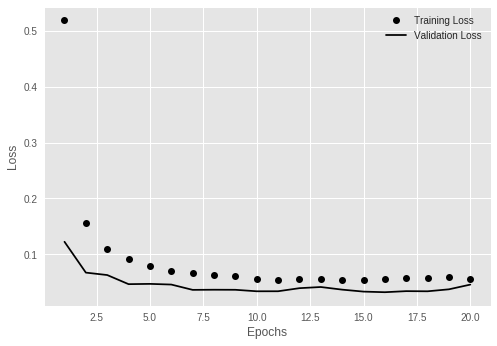

In [16]:
# Plotting Training and Validation Loss

epochs = range(1, 21)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

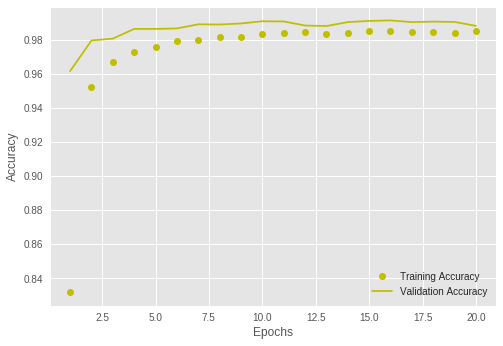

In [17]:
# Plotting Training and Validation Accuracy


plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Evaluating on Test Data

test_loss, test_acc = model.evaluate(test_data, test_labels)
test_loss, test_acc

10000/10000 [==============================] - 1s 115us/step


(0.031344289843946174, 0.9914)